In [19]:
# tabular data
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn for modeling:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### Planning


In [2]:
from pydataset import data

I'm going to work with the iris data set

Based on what we have seen from the iris data set, I know I'm going to have five columns or fields of information:
- petal length
- petal width
- sepal length
- sepal width
- species

Problem statement: Can I reliably use the other four present fields (from one, up to four features) to reliably predictt which species of iris flower that I have present?

X: potentially: petal length, petal width, sepal length, sepal width

Y: species, a label (which means this is a supervised machine learning problem, specifically the classification type because its a discrete label)

### Acquisition

In [4]:
# grab my data from pydataset:
iris = data('iris')
# do I have it now?
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Preparation

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
# let's clean up those column names
# ways we could do that:
# iris.rename(columns={'blah': 'real_blah'})
# in this case, I want to change each of the values
# to lowercase and replace the periods with underscores
iris.columns = [col.lower().replace('.', '_') for col in iris.columns]

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Exploration

In [15]:
train_val, test = train_test_split(
    iris, 
    train_size=0.8, 
    random_state=1349, 
    stratify=iris['species']
)

train, validate = train_test_split(
    train_val,
    train_size=0.7,
    random_state=1349,
    stratify=train_val['species']
)

In [16]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

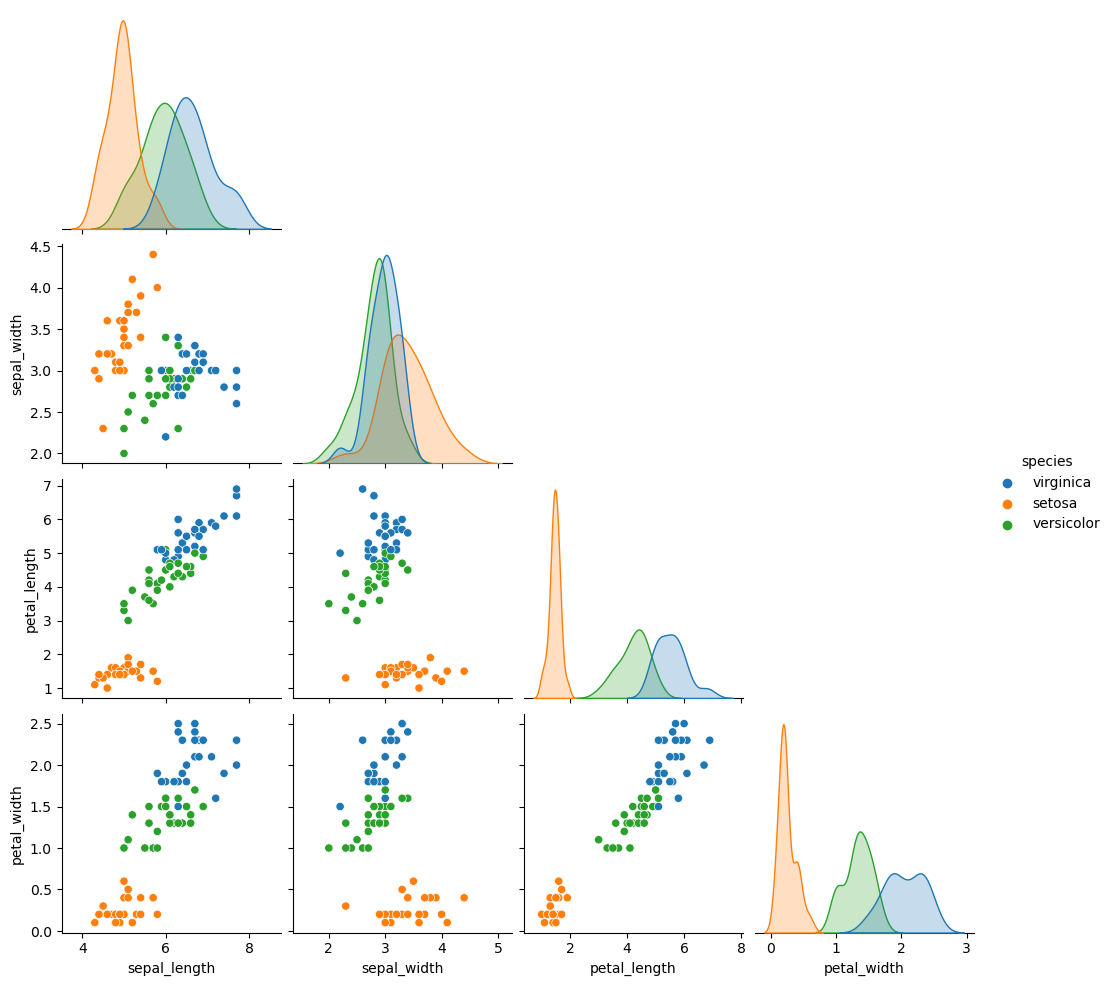

In [18]:
sns.pairplot(train, corner=True, hue='species')
plt.show()

In [20]:
# cursory takeaways here:
# petal length, petal width,
# sepal length, sepal width

### Modeling!!

In [21]:
x_cols = train.columns.to_list()
y_cols = 'species'

In [22]:
# drop species out of x_cols:
x_cols.remove('species')

In [23]:
x_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [29]:
train[x_cols].head(4)

,sepal_length,sepal_width,petal_length,petal_width
139,6.0,3.0,4.8,1.8
8,5.0,3.4,1.5,0.2
80,5.7,2.6,3.5,1.0
75,6.4,2.9,4.3,1.3


In [28]:
train[y_cols].head(4)

139     virginica
8          setosa
80     versicolor
75     versicolor
Name: species, dtype: object

- Make the thing
- Fitting the thing
- Using the thing

In [30]:
# make the thing
clf = DecisionTreeClassifier()

In [31]:
# whats the thing?
clf

DecisionTreeClassifier()

In [33]:
# fit the thing:
# note that I'm not assigning clf.fit into anything
# clf.fit changes the object itself,
# which means its ready to use!
clf.fit(train[x_cols], train[y_cols])

DecisionTreeClassifier()

In [35]:
# use the thing!!!
model_1_preds = clf.predict(train[x_cols])

In [36]:
# let's make a second model
# before we start talking about scores
# make the thing
clf1 = DecisionTreeClassifier(max_depth=2)
# fit the thing
clf1.fit(train[x_cols], train[y_cols])
# use the thing
model_2_preds = clf1.predict(train[x_cols])

In [37]:
clf1.score(train[x_cols], train[y_cols])

0.9642857142857143

In [39]:
clf2 = DecisionTreeClassifier(max_depth=1)
# quick note:
# .fit calls take in a X and a Y as the labels
# that are there to train the model
clf2.fit(train[x_cols], train[y_cols])
# predict will just take in the domain
model_3_preds = clf2.predict(train[x_cols])

In [40]:
# accuracy lil more like we saw before
accuracy_score(train[y_cols], model_3_preds)

0.6666666666666666

In [41]:
clf2.score(train[x_cols], train[y_cols])

0.6666666666666666

In [43]:
print(export_text(clf, feature_names=x_cols))

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- sepal_length <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal_length >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- class: virginica



In [44]:
clf.score(train[x_cols], train[y_cols])

1.0

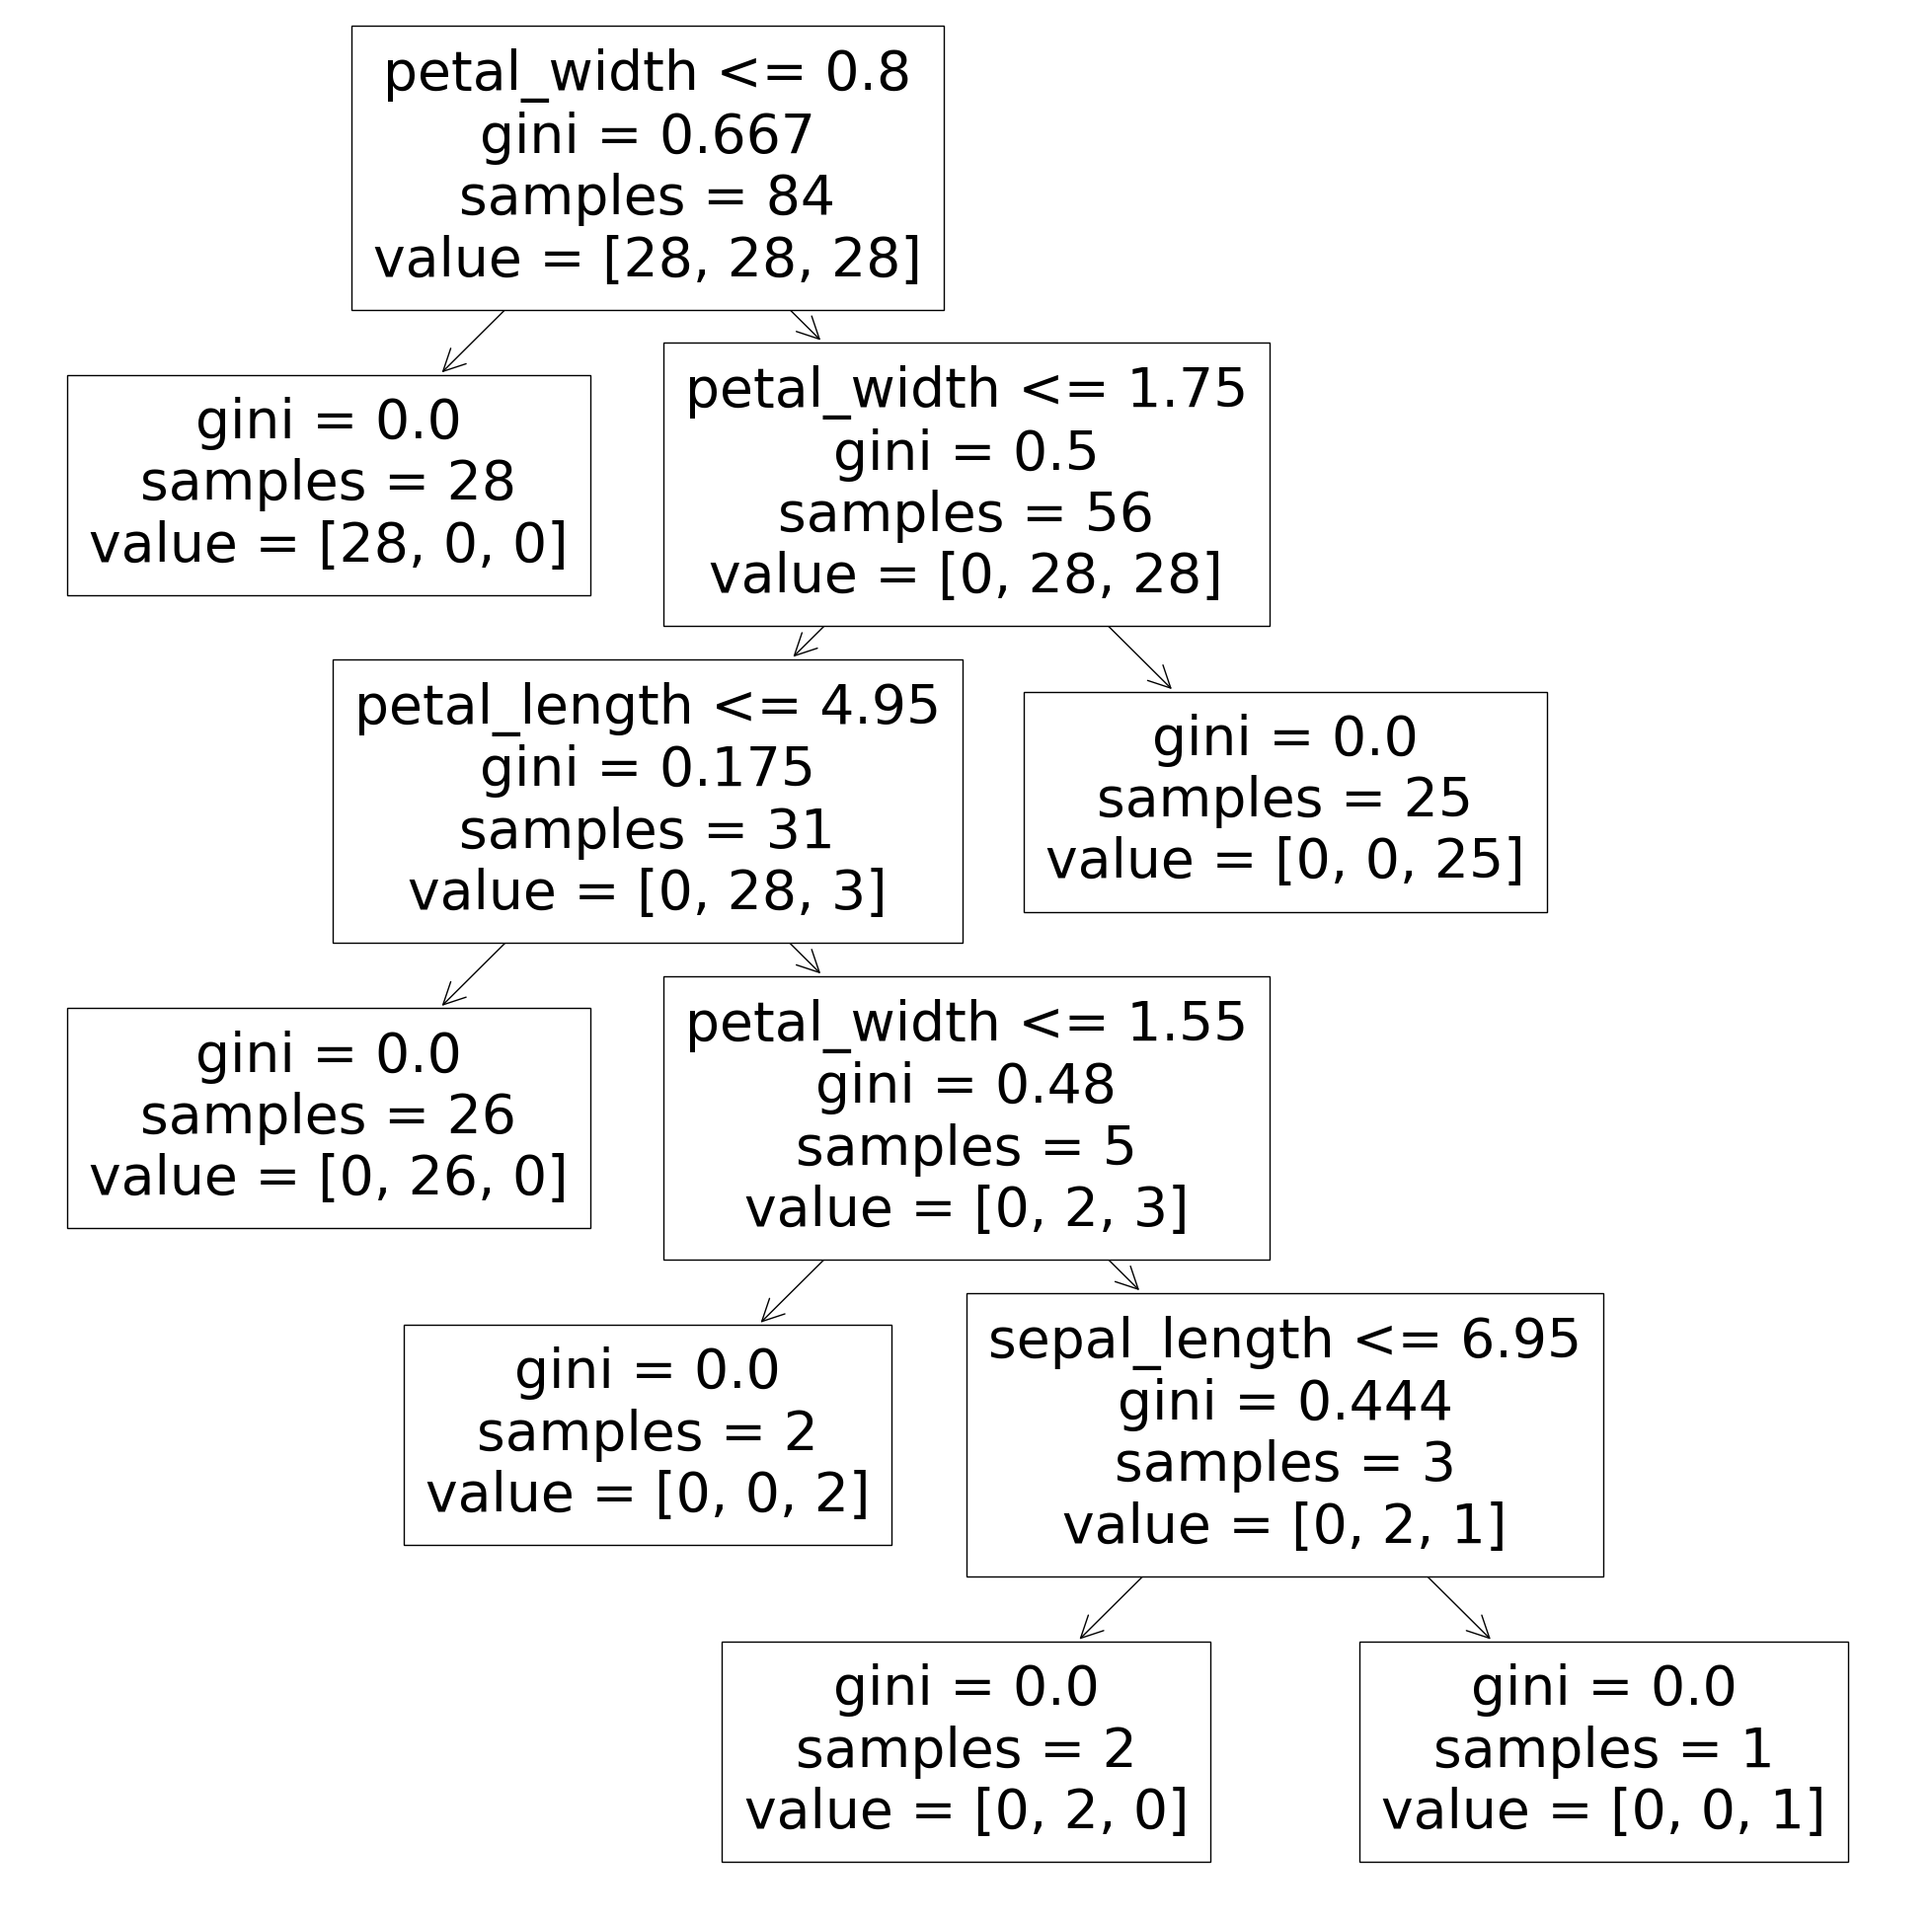

In [48]:
plt.figure(figsize=(25, 25))
plot_tree(clf, feature_names=x_cols)
plt.show()

In [50]:
# classification report:
print(classification_report(train[y_cols],
                      model_2_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      1.00      0.95        28
   virginica       1.00      0.89      0.94        28

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



- let's now train a random forest model on our data

In [52]:
x_train = train[x_cols]
y_train = train[y_cols]

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# make the thing
rf = RandomForestClassifier()
# fit the thing
# note: if we narrow down the feature in fit
rf.fit(x_train[['petal_length', 'petal_width']], y_train)
# use the thing
# we need to do it on predict as well!!
rf1_preds = rf.predict(x_train[['petal_length', 'petal_width']])

Model assessments and predictions!

In [56]:
# well what do these models do on validate

In [60]:
# narrow down independent and dependent features with my
# lists of features from before
x_val, y_val = validate[x_cols], validate[y_cols]

In [61]:
clf.score(x_val, y_val)

0.9722222222222222

In [64]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf1.score(x_train, y_train)}
Accuracy (validate): {round(clf1.score(x_val, y_val), 2)}''')


Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): 0.9642857142857143
Accuracy (validate): 0.94


In [66]:
print(f'''
Performance in accuracy of Decision Tree 3 on training data:
Accuracy (train): {clf2.score(x_train, y_train)}
Accuracy (validate): {round(clf2.score(x_val, y_val), 2)}''')


Performance in accuracy of Decision Tree 3 on training data:
Accuracy (train): 0.6666666666666666
Accuracy (validate): 0.67


In [67]:
rf_feats = ['petal_length', 'petal_width']
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(x_train[rf_feats], y_train)}
Accuracy (validate): {round(rf.score(x_val[rf_feats], y_val), 2)}''')


Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): 1.0
Accuracy (validate): 0.97


What's ok:

train / val / test:

- train:
    - .fit()
    - .predict()
    - model.score()
- val:
    - .predict()
    - .score()
- test: 
    - .score()/.predict (but just once, when we select the best model)

In [68]:
val_pred = rf.predict(x_val[rf_feats])

In [69]:
# yasssssification report:
pd.DataFrame(classification_report(y_val, val_pred, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.923077,1.000000,0.972222,0.974359,0.974359
recall,1.0,1.000000,0.916667,0.972222,0.972222,0.972222
f1-score,1.0,0.960000,0.956522,0.972222,0.972174,0.972174
support,12.0,12.000000,12.000000,0.972222,36.000000,36.000000


- Decision Tree Model #2 had a high level of consistency between accuracy on train and validate
- The other two most performing models had 100% accuracy on train, which almost certainly means they were overfit (see depth on decision tree/rf hyperparameters)
- Because of this, Model #2 appears to be my best performer
- Let's see how it does on test before we put it into production

In [71]:
# final test: on the test
# remember! Just once! Not just once per algorithm!
# use the assessment on your test set *AFTER* you have
# chosen your best model
clf1.score(test[x_cols], test[y_cols])

0.9666666666666667